In [77]:
from src import util
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy as np
import json

In [119]:
# Given code
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def plot_data(X,Y,theta):
    plt.figure()
    plt.scatter(X[:,1], X[:,2],c=Y)
    
    # Decision Bdry
    x11_max = np.max(X[:,1])
    x21 = (-theta[0]-theta[1]*x11_max)/theta[2]
    x12_min = np.min(Xa[:,1])
    x22 = (-theta[0]-theta[1]*x12_min)/theta[2]
    
    plt.plot([x11_max,x12_min], [x21,x22])


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return 

In [80]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30395 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations


KeyboardInterrupt: 

In [81]:
# part-a
print('Part-a: Training converged for Dataset-(a) while it is taking unexpected long time for training Dataset-(b)')

Part-a: Training converged for Dataset-(a) while it is taking unexpected long time for training Dataset-(b)


Text(0.5, 1.0, 'Dataset-(b)')

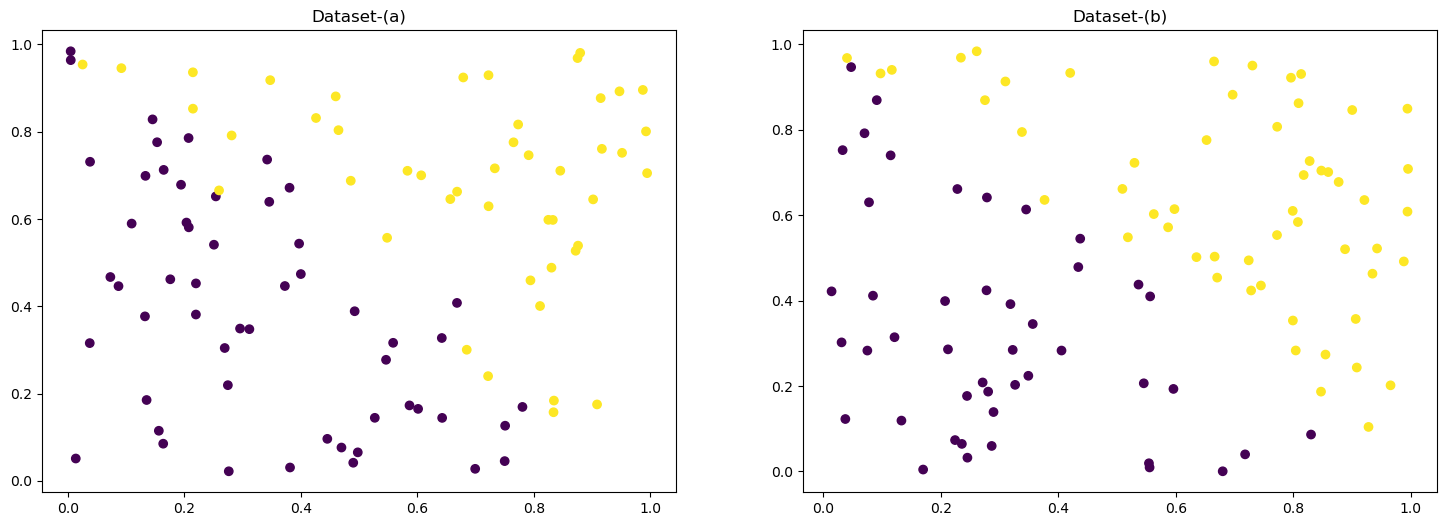

In [82]:
# part-b
# Debugging

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.scatter(Xa[:,1], Xa[:,2],c=Ya)
plt.title('Dataset-(a)')

plt.subplot(1,2,2)
plt.scatter(Xb[:,1], Xb[:,2],c=Yb)
plt.title('Dataset-(b)')

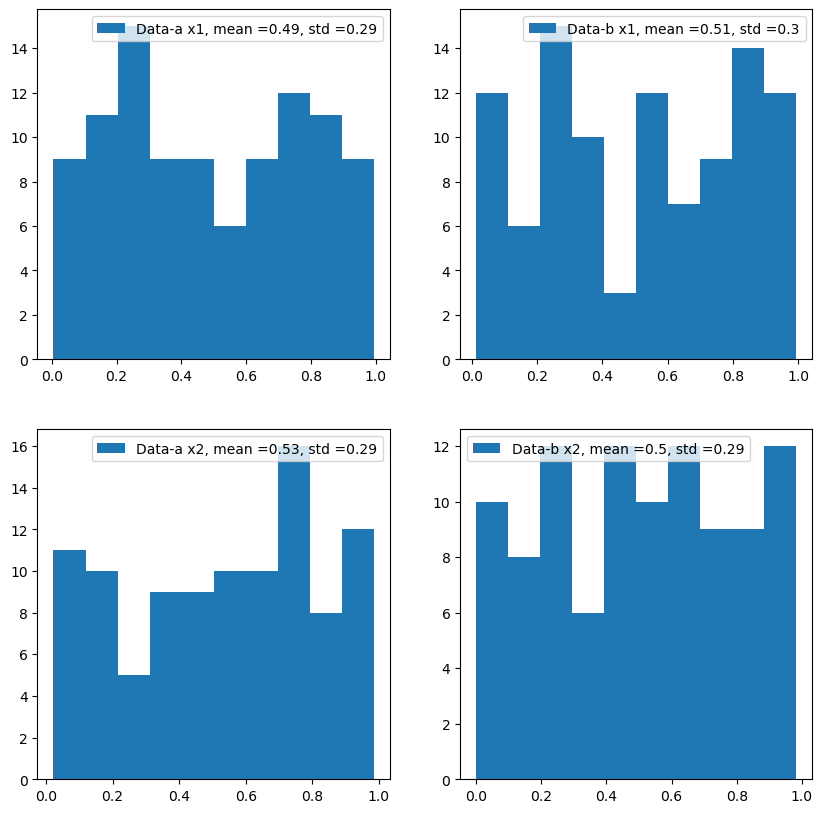

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(Xa[:,1], label='Data-a x1, mean ={}, std ={}'.format(np.round(np.mean(Xa[:,1]),2), np.round(np.std(Xa[:,1]),2)))
plt.legend()

plt.subplot(222)
plt.hist(Xb[:,1], label='Data-b x1, mean ={}, std ={}'.format(np.round(np.mean(Xb[:,1]),2), np.round(np.std(Xb[:,1]),2)))
plt.legend()

plt.subplot(223)
plt.hist(Xa[:,2], label='Data-a x2, mean ={}, std ={}'.format(np.round(np.mean(Xa[:,2]),2), np.round(np.std(Xa[:,2]),2)))
plt.legend()

plt.subplot(224)
plt.hist(Xb[:,2], label='Data-b x2, mean ={}, std ={}'.format(np.round(np.mean(Xb[:,2]),2), np.round(np.std(Xb[:,2]),2)))
plt.legend()

In [ ]:
print('Part-(b) May be it is because of the learning rate', '\n May be it is scaling features with zero mean')

#### Option-1: Using different learning rate

In [101]:
def logistic_regression(X, Y, lr=10):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = lr

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if i==1000000:
            print('At lr = {} : Algo Did not converge in 1 Million itrs'.format(lr))
            break
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return 

In [102]:
lrs = [15, 20, 25, 30]

for lr in lrs:
    
    print('Using Learning Rate of {}'.format(lr))

    print('==== Training model on data set A ====')
    Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
    logistic_regression(Xa, Ya, lr)

    print('\n==== Training model on data set B ====')
    Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
    logistic_regression(Xb, Yb, lr)

Using Learning Rate of 15
==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Converged in 20478 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310

Finished 830000 iterations
Finished 840000 iterations
Finished 850000 iterations
Finished 860000 iterations
Finished 870000 iterations
Finished 880000 iterations
Finished 890000 iterations
Finished 900000 iterations
Finished 910000 iterations
Finished 920000 iterations
Finished 930000 iterations
Finished 940000 iterations
Finished 950000 iterations
Finished 960000 iterations
Finished 970000 iterations
Finished 980000 iterations
Finished 990000 iterations
Finished 1000000 iterations
At lr = 25 : Algo Did not converge in 1 Million itrs
Using Learning Rate of 30
==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations

### Option-B Decrease lr by 1/t2 factor

In [117]:
def logistic_regression_weight_decay(X, Y, lr=10):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = lr

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate/i**2 * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if i==1000000:
            print('At lr = {} : Algo Did not converge in 1 Million itrs'.format(lr))
            break
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return 

In [118]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
logistic_regression_weight_decay(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
logistic_regression_weight_decay(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 340000 iterations
Finished 350000 iterations
Finished 360000 iteration

In [ ]:
print('Scaling didnt solve the problem' )

### Linear scaling of input
 Input features are already in [0,1] range. So, I don't think scaling would help.

In [114]:
# Let's try doing normal distribution
from sklearn.preprocessing import StandardScaler

def normalize_dataset(X):
    m,n  = X.shape
    X_features = X[:,1:] # drop x0=1 row
    scaler = StandardScaler()
    scaler.fit(X_features)
    
    X_normalized = scaler.transform(X_features)
    
    transformed_dataset = np.ones((m,n))
    
    transformed_dataset[:,1:] = X_normalized
    
    return transformed_dataset
    
    



In [120]:
Xa_normalized = normalize_dataset(Xa)
Xb_normalized = normalize_dataset(Xb)

In [121]:
print('==== Training model on data set A ====')
logistic_regression(Xa_normalized, Ya)

print('\n==== Training model on data set B ====')
logistic_regression(Xb_normalized, Yb)

==== Training model on data set A ====
Converged in 1835 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 3

KeyboardInterrupt: 

In [ ]:
print('FOr dataset-(a) Standar Scaling dataset helped in even faster convergence and reduced itrs from 30395 to 1835')